In [1]:
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("New_York_City_Leading_Causes_of_Death.csv")

print data.info()
print data.head()

Populating the interactive namespace from numpy and matplotlib
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2880 entries, 0 to 2879
Data columns (total 6 columns):
Year              2880 non-null int64
Ethnicity         2880 non-null object
Sex               2880 non-null object
Cause of Death    2880 non-null object
Count             2880 non-null int64
Percent           2880 non-null int64
dtypes: int64(3), object(3)
memory usage: 157.5+ KB
None
   Year           Ethnicity   Sex                          Cause of Death  \
0  2010  NON-HISPANIC BLACK  MALE    HUMAN IMMUNODEFICIENCY VIRUS DISEASE   
1  2010  NON-HISPANIC BLACK  MALE                 INFLUENZA AND PNEUMONIA   
2  2010  NON-HISPANIC BLACK  MALE         INTENTIONAL SELF-HARM (SUICIDE)   
3  2010  NON-HISPANIC BLACK  MALE                     MALIGNANT NEOPLASMS   
4  2010  NON-HISPANIC BLACK  MALE  MENTAL DISORDERS DUE TO USE OF ALCOHOL   

   Count  Percent  
0    297        5  
1    201        3  
2     64        1  


In [84]:
only2 = [u'DISEASES OF HEART', u'MALIGNANT NEOPLASMS']

data1 = data[data['Cause of Death'].isin(only2)]
print data1['Cause of Death'].unique()
print data1.head()

['MALIGNANT NEOPLASMS' 'DISEASES OF HEART']
    Year           Ethnicity     Sex       Cause of Death  Count  Percent
3   2010  NON-HISPANIC BLACK    MALE  MALIGNANT NEOPLASMS   1540       23
22  2010  NON-HISPANIC WHITE  FEMALE    DISEASES OF HEART   5351       40
27  2010  NON-HISPANIC WHITE  FEMALE  MALIGNANT NEOPLASMS   3438       25
47  2010  NON-HISPANIC WHITE    MALE    DISEASES OF HEART   4495       37
52  2010  NON-HISPANIC WHITE    MALE  MALIGNANT NEOPLASMS   3408       28


In [85]:
print data1['Year'].unique()

[2010 2011 2007 2008 2009]


In [86]:
data1['Cause of Death'].value_counts().index

Index([u'DISEASES OF HEART', u'MALIGNANT NEOPLASMS'], dtype='object')

In [87]:
data1.groupby(["Cause of Death", "Year"]).sum()

Count  Percent
Cause of Death      Year                
DISEASES OF HEART   2007  63585      861
                    2008  62754      855
                    2009  59409      840
                    2010  53061      762
                    2011  50166      708
MALIGNANT NEOPLASMS 2007  39312      618
                    2008  38691      588
                    2009  39183      621
                    2010  39597      621
                    2011  40008      627

In [88]:
ind = data1['Cause of Death'].value_counts().index

# Getting counts for each gender values across starttime_hour values
deaths2007 = data1.loc[data1.Year==2007].groupby(['Cause of Death'])['Count'].sum()
deaths2008 = data1.loc[data1.Year==2008].groupby(['Cause of Death'])['Count'].sum()
deaths2009 = data1.loc[data1.Year==2009].groupby(['Cause of Death'])['Count'].sum()
deaths2010 = data1.loc[data1.Year==2010].groupby(['Cause of Death'])['Count'].sum()
deaths2011 = data1.loc[data1.Year==2011].groupby(['Cause of Death'])['Count'].sum()

print len(ind)
print len(deaths2007)
print len(deaths2008)
print len(deaths2009)
print len(deaths2010)
print len(deaths2011)

2
2
2
2
2
2


(0.625, 3.125)

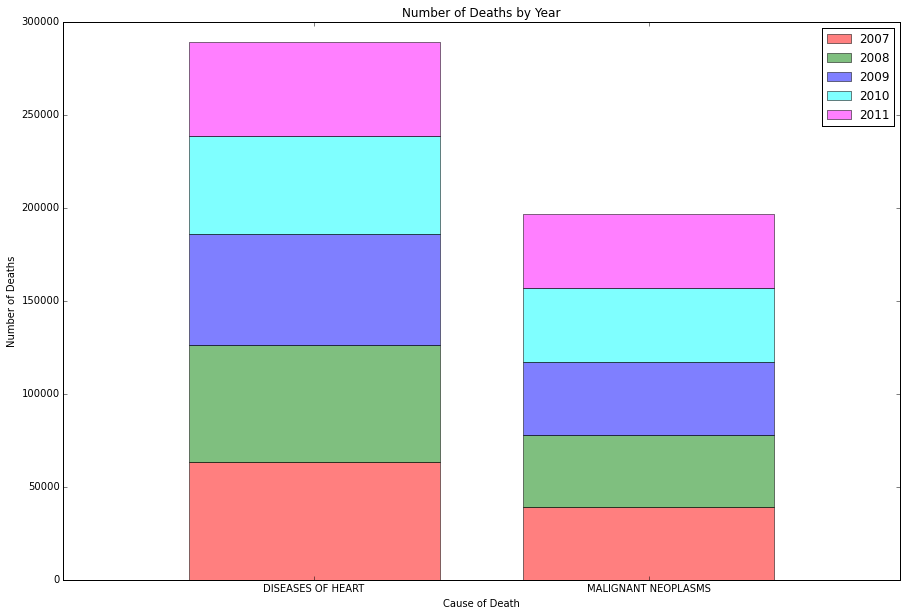

In [89]:
# Create the general blog and the "subplots" i.e. the bars
f, ax1 = plt.subplots(1, figsize=(15,10))

# Set the bar width
bar_width = 0.75

# positions of the left bar-boundaries
bar_l = [i+1 for i in range(len(deaths2007))]

# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l]

ax1.bar(bar_l,
        deaths2007,
        width=bar_width,
        label='2007',
        alpha=0.5,
        color='red')

ax1.bar(bar_l,
        deaths2008,
        width=bar_width,
        bottom=deaths2007,
        label='2008',
        alpha=0.5,
        color='green')

ax1.bar(bar_l,
        deaths2009,
        width=bar_width,
        bottom=[i+j for i,j in zip(deaths2007,deaths2008)],
        label='2009',
        alpha=0.5,
        color='blue')

ax1.bar(bar_l,
        deaths2010,
        width=bar_width,
        bottom=[i+j+k for i,j,k in zip(deaths2007,deaths2008,deaths2009)],
        label='2010',
        alpha=0.5,
        color='cyan')

ax1.bar(bar_l,
        deaths2011,
        width=bar_width,
        bottom=[i+j+k+l for i,j,k,l in zip(deaths2007,deaths2008,deaths2009,deaths2010)],
        label='2011',
        alpha=0.5,
        color='magenta')

# set the x ticks with names
plt.xticks(tick_pos, ind)

# Set the label and legends
ax1.set_title("Number of Deaths by Year")
ax1.set_ylabel("Number of Deaths")
ax1.set_xlabel("Cause of Death")
plt.legend(loc='best')

# Set a buffer around the edge
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])